# 4-1-2: Reading images into dataframes

## Download image data and install packages

In [1]:
!rm -rf *.zip osm-cca-* 2>/dev/null
!git clone https://github.com/cca-cce/osm-cca-nlp.git

Cloning into 'osm-cca-nlp'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 89 (delta 24), reused 83 (delta 18), pack-reused 0 (from 0)
Receiving objects: 100% (89/89), 17.05 MiB | 16.57 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [2]:
!pip install -q pymupdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 50.0 MB/s eta 0:00:00


## Convert PDF to image files

In [3]:
import fitz  # PyMuPDF
import os

# List of directories
directories = [
    '/content/osm-cca-nlp/res/pdf/preem',
    '/content/osm-cca-nlp/res/pdf/vattenfall'
]

for directory in directories:
    if not os.path.exists(directory):
        print(f"Directory does not exist: {directory}")
        continue

    for filename in os.listdir(directory):
        if filename.lower().endswith('.pdf'):
            pdf_path = os.path.join(directory, filename)
            print(f"Processing PDF: {pdf_path}")

            try:
                doc = fitz.open(pdf_path)
                for page_num in range(len(doc)):
                    page = doc[page_num]
                    for img_index, img in enumerate(page.get_images(full=True)):
                        xref = img[0]
                        base_image = doc.extract_image(xref)
                        image_bytes = base_image["image"]
                        image_ext = base_image["ext"]

                        # Save the image
                        output_prefix = os.path.join(directory, os.path.splitext(filename)[0])
                        output_filename = f"{output_prefix}_page{page_num}_img{img_index}.{image_ext}"
                        with open(output_filename, "wb") as f:
                            f.write(image_bytes)
                        print(f"Saved image: {output_filename}")
            except Exception as e:
                print(f"Failed to process {pdf_path}: {e}")


Processing PDF: /content/osm-cca-nlp/res/pdf/preem/towards-a-climate-neutral-value-chain.pdf
Saved image: /content/osm-cca-nlp/res/pdf/preem/towards-a-climate-neutral-value-chain_page2_img0.png
Saved image: /content/osm-cca-nlp/res/pdf/preem/towards-a-climate-neutral-value-chain_page3_img0.png
Processing PDF: /content/osm-cca-nlp/res/pdf/preem/raw-materials-sustainability-preem.pdf
Saved image: /content/osm-cca-nlp/res/pdf/preem/raw-materials-sustainability-preem_page0_img0.png
Processing PDF: /content/osm-cca-nlp/res/pdf/preem/carbon-capture-and-storage-preem.pdf
Processing PDF: /content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem.pdf
Saved image: /content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page1_img0.png
Saved image: /content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png
Saved image: /content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-projec

## Read image files to Pandas Dataframe

In [6]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Read the image using OpenCV
image_path = '/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png'  # Replace with your image path
image = cv2.imread(image_path)

# Display image dimensions
if image is not None:
    height, width, channels = image.shape
    print(f"Image dimensions: {width} x {height} pixels")
    print(f"Number of color channels: {channels}")
else:
    print("Failed to load image. Please check the path.")


Image dimensions: 800 x 533 pixels
Number of color channels: 3


# 4-1-3: Descriptive image analysis

## Read and display images

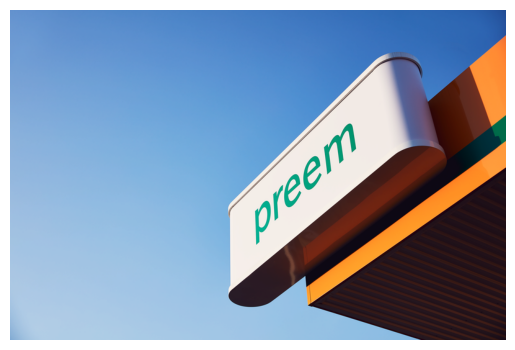

In [5]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Read the image using OpenCV
image_path = '/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the color scheme from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use Seaborn to improve plot aesthetics
sns.set()  # Apply Seaborn styles

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()


## Count pixels, width, height, channels

In [7]:
import os
import cv2
import pandas as pd

# Paths to the directories containing images
directories = ['osm-cca-nlp/res/pdf/preem', 'osm-cca-nlp/res/pdf/vattenfall']

# Initialize a list to store image data
image_data = []
image_id = 1  # Initialize image ID counter

# Iterate through each directory
for directory in directories:
    if not os.path.exists(directory):
        print(f"Directory does not exist: {directory}")
        continue

    # Iterate through each file in the directory
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Add other image formats if needed
            # Read the image
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)

            if img is None:  # Skip if the image cannot be loaded
                print(f"Unable to read image: {img_path}")
                continue

            # Extract image dimensions and channels
            height, width, channels = img.shape

            # Append the data to the list
            image_data.append({
                'Image_ID': image_id,
                'Folder_Name': os.path.basename(directory),
                'Filename': filename,
                'Width': width,
                'Height': height,
                'Channels': channels
            })

            image_id += 1  # Increment the image ID

# Create a DataFrame from the image data
image_df = pd.DataFrame(image_data)

# Display the DataFrame
image_df.head()


,Image_ID,Folder_Name,Filename,Width,Height,Channels
0,1,preem,towards-a-climate-neutral-value-chain_page2_im...,800,600,3
1,2,preem,production-of-renewable-diesel-synsat-project-...,1050,789,3
2,3,preem,raw-materials-sustainability-preem_page0_img0.png,800,318,3
3,4,preem,production-of-renewable-diesel-synsat-project-...,1050,789,3
4,5,preem,production-of-renewable-diesel-synsat-project-...,800,533,3


## Extract image features, color info

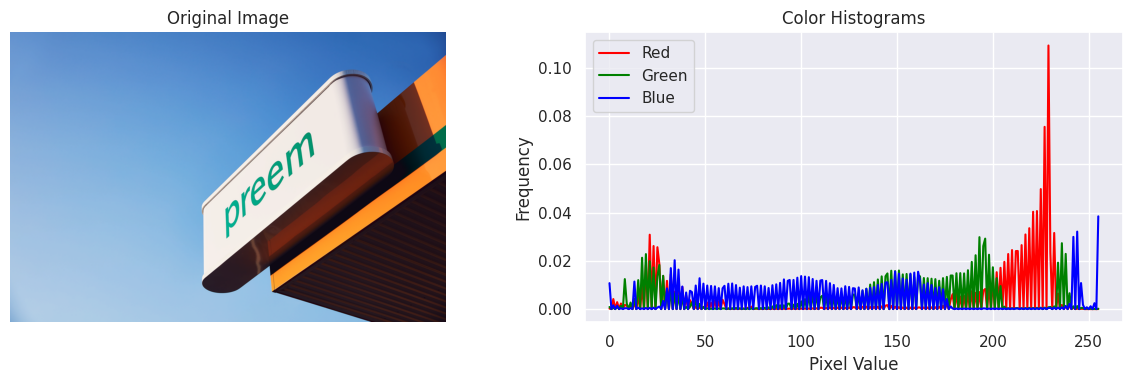

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the image
image = cv2.imread('/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png')

# Calculate color histograms for each channel
hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])

# Normalize histograms
hist_r /= hist_r.sum()
hist_g /= hist_g.sum()
hist_b /= hist_b.sum()

# Create subplots for the original image and histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot the color histograms using Seaborn
sns.lineplot(x=np.arange(256), y=hist_r.squeeze(), color='red', ax=axes[1], label='Red')
sns.lineplot(x=np.arange(256), y=hist_g.squeeze(), color='green', ax=axes[1], label='Green')
sns.lineplot(x=np.arange(256), y=hist_b.squeeze(), color='blue', ax=axes[1], label='Blue')
axes[1].set_title('Color Histograms')
axes[1].set_xlabel('Pixel Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


## Extract image features, edge info

Edge Detection Algorithm: Canny


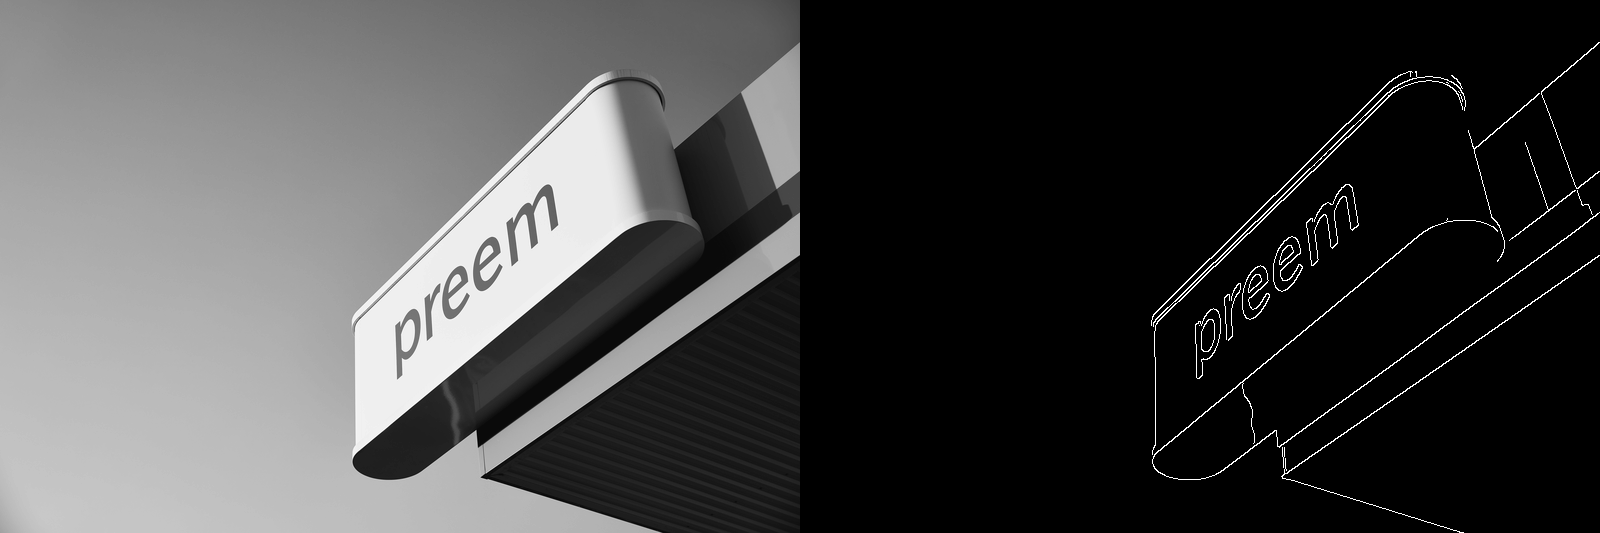

Number of white edge pixels: 6081

Saved as edges_Canny.jpg

Edge Detection Algorithm: Sobel_X


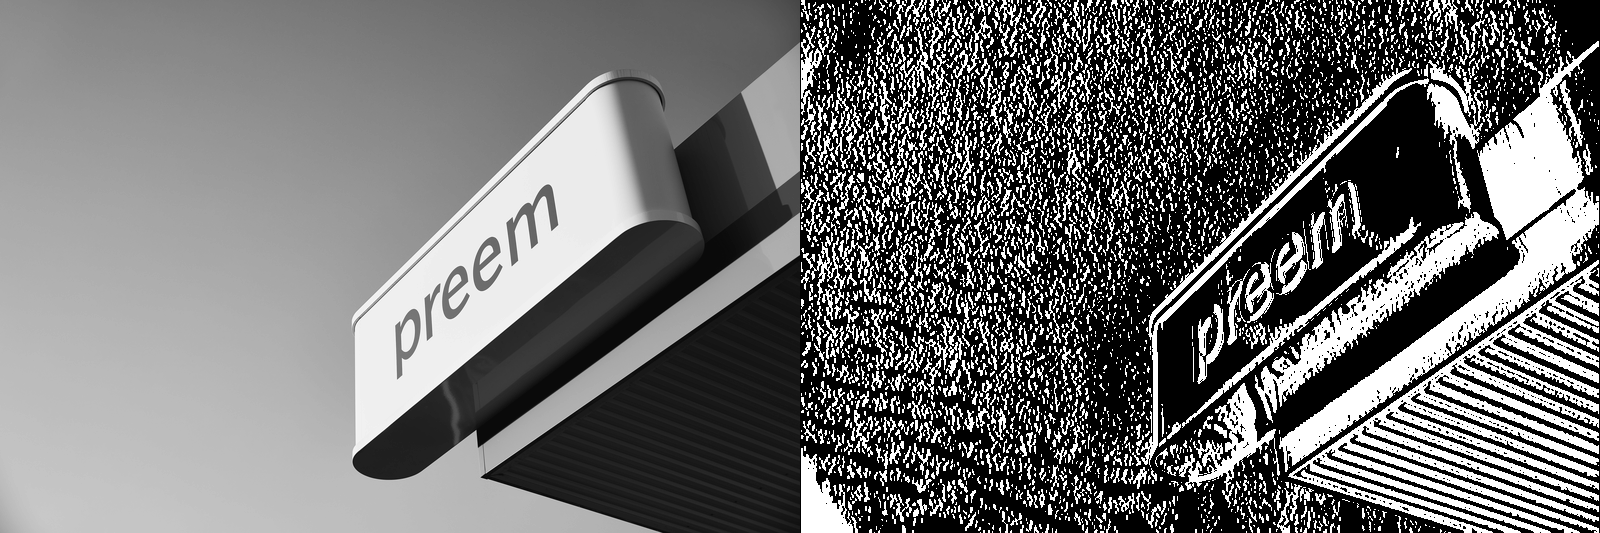

Number of white edge pixels: 149451

Saved as edges_Sobel_X.jpg

Edge Detection Algorithm: Sobel_Y


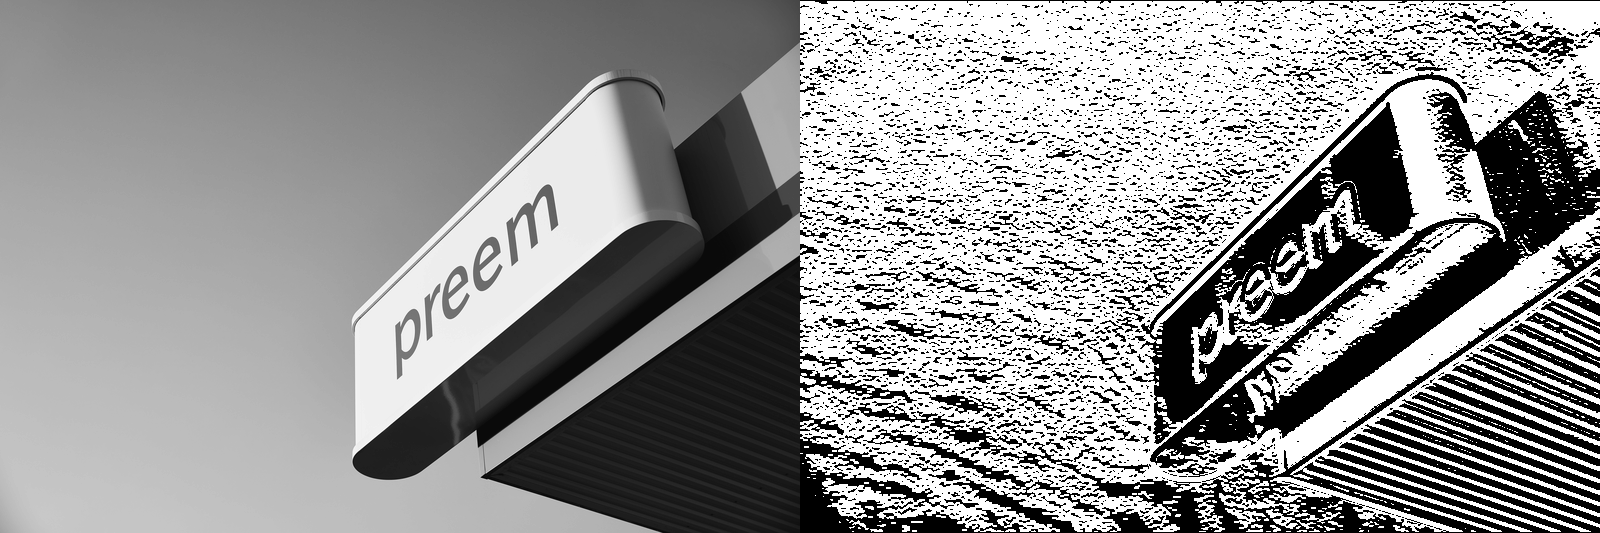

Number of white edge pixels: 271256

Saved as edges_Sobel_Y.jpg



In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png', cv2.IMREAD_GRAYSCALE)

# Define edge detection settings
edge_detection_settings = [
    ('Canny', cv2.Canny(image, 50, 150)),
#    ('Laplacian', cv2.Laplacian(image, cv2.CV_64F)),
    ('Sobel_X', cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)),
    ('Sobel_Y', cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5))
]

# Iterate through edge detection settings
for setting_name, edges in edge_detection_settings:
    # Convert the edges to binary (keeping them in 0-255 range)
    edges_binary = np.where(edges > 0, 255, 0).astype(np.uint8)

    # Count the number of white edge pixels
    white_pixel_count = cv2.countNonZero(edges_binary)

    # Concatenate the original image and binary edge image horizontally
    concatenated_image = np.hstack((image, edges_binary))

    # Display the concatenated image using cv2_imshow
    print(f'Edge Detection Algorithm: {setting_name}')
    cv2_imshow(concatenated_image)
    print(f'Number of white edge pixels: {white_pixel_count}\n')

    # Save the concatenated image with the specified filename prefix
    filename = f'edges_{setting_name}.jpg'
    cv2.imwrite(filename, concatenated_image)

    print(f'Saved as {filename}\n')


# 4-2-2: Inferential image analysis, classification

In [ ]:
import pandas as pd

# 4-2-3: Inferential image analysis, object detection

In [ ]:
import pandas as pd

# 4-3-2: Summarizing results of image analysis

In [ ]:
import pandas as pd

# 4-3-3: Visualizing results of image analysis

In [ ]:
import pandas as pd